In [12]:
import numpy as np
import matplotlib.pyplot as plt
import lammps_logfile as lf
import os

# Part a) 

Histogram of velocities

File read!


/var/folders/tb/7t6gcvwn2f35mdzypnx7vb0c0000gn/T/ipykernel_30383/3562227540.py:43: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show() #shows the figure object


NameError: name 'camera' is not defined

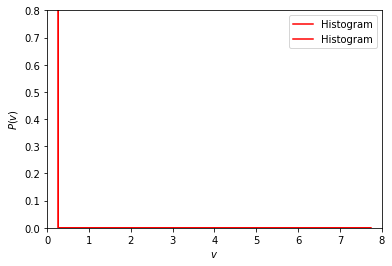

In [7]:
from ase.io import read
from celluloid import Camera 
import matplotlib.animation as animation
from IPython import display
import time
from IPython.display import HTML

file_name = "simple_md/dump.lammpstrj"
traj = read(file_name, format="lammps-dump-text", index=":")
print("File read!")
 
n = len(traj)
n_bins = 30
v_min = 0
v_max = 8

v_T = traj[n-1].get_velocities()
v_mod_T = np.sqrt(v_T[:, 0]**2 + v_T[:, 1]**2 + v_T[:, 2]**2)
h_T, bins = np.histogram(v_T[:, 0], bins=n_bins, range=(v_min, v_max))
h_T2 = h_T * h_T

fig = plt.figure(1)
ax = fig.add_subplot() 
cam = Camera(fig)

for i, frame in enumerate(traj):
    v_t = frame.get_velocities()
    
    v_mod_t = np.sqrt(v_t[:, 0]**2 + v_t[:, 1]**2 + v_t[:, 2]**2)
    h_t, _ = np.histogram(v_t[:, 0], bins=n_bins, range=(v_min, v_max))
   
    h_norm = np.zeros_like(h_T)
    h_norm[h_T2 != 0] = h_t[h_T2 != 0] * h_T[h_T2 != 0] / h_T2[h_T2 != 0]
    
    ax.plot(bins[:-1], h_t, '-r', label="Histogram")
    plt.plot(bins[:-1], h_T, '-r', label="Histogram")
    ax.set_xlabel(r"$v$")
    ax.set_ylabel(r"$P(v)$")
    plt.xlim(v_min, v_max)
    plt.ylim(0, 0.8)
    plt.legend()
    
    fig.show() #shows the figure object
    fig.canvas.draw() 
    cam.snap() # camera object to capture teh animation
    time.sleep(1)

animation = camera.animate(interval = 200, repeat = True, repeat_delay = 500)
HTML(animation.to_html5_video())
animation.save('abc.mp4') # to save     


In [ ]:
import imageio

# GIF Stuff Bellow

filenames = list()
print("Starting making the gif")
for i, frame in enumerate(traj):
    plt.figure("Distribution of Velocities")
     
    v_t = frame.get_velocities()
    print(v_t[0, 0], v_t[0, 1], v_t[0, 2])
    
    v_mod_t = np.sqrt(v_t[:, 0]**2 + v_t[:, 1]**2 + v_t[:, 2]**2)
    h_t, _ = np.histogram(v_t[:, 0], bins=n_bins, range=(v_min, v_max))
   
    h_norm = np.zeros_like(h_T)
    h_norm[h_T2 != 0] = h_t[h_T2 != 0] * h_T[h_T2 != 0] / h_T2[h_T2 != 0]
    
    # plt.plot(np.linspace(0, 6, 1000), maxwell_velocity(np.linspace(0, 6, 1000), T), '-r', label="Maxwell-Boltzmann Distribution")
    plt.plot(bins[:-1], h_t, '-r', label="Histogram")
    plt.plot(bins[:-1], h_T, '-r', label="Histogram")
    plt.xlabel(r"$v$")
    plt.ylabel(r"$P(v)$")
    plt.xlim(v_min, v_max)
    plt.ylim(0, 0.8)
    plt.legend()

    # create file name and append it to a list
    filename = f'{i}.png'
    filenames.append(filename)
    plt.savefig(filename)
    plt.close()
    
    if i > 30:
        exit()

    print(f"{i+1}/{n}", end="\r")

# build gif
with imageio.get_writer('velocity.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
print("Gif done!")
print("Removing files")        
# Remove files
for filename in set(filenames):
    os.remove(filename)

# Part b) and c)

Finding the total KE of the system and plotting the size of the fluctuations as a function of the timestep dt

done 1/6
done 2/6
done 3/6
done 4/6
done 5/6
done 6/6


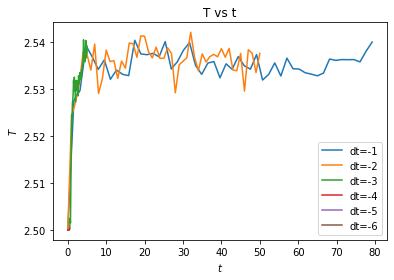

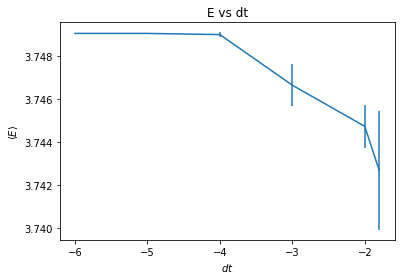

In [15]:
dt_vals = np.power(10.0, np.array([-1.8, -2, -3, -4, -5, -6]))
n_measure = 51

filename = lambda x: "part_b/log_" + str(x) + ".lammps"

T = np.zeros((len(dt_vals), n_measure))
E = np.zeros((len(dt_vals), n_measure))
t = np.zeros((len(dt_vals), n_measure))

for i, dt in enumerate(dt_vals):
    file = lf.File(filename(i+1))
    
    t[i, :] = file.get("Time")
    T[i, :] = file.get("Temp")
    E[i, :] = file.get("TotEng")
    
    plt.figure("T vs t")
    plt.title("T vs t")
    plt.plot(t[i, :], T[i, :], label=f"dt={int(np.log10(dt))}")
    plt.xlabel(r"$t$")
    plt.ylabel(r"$T$")
    plt.legend()
    
    print(f"done {i+1}/{len(dt_vals)}")

plt.figure("E vs dt")
plt.title("E vs dt")
plt.errorbar(np.log10(dt_vals), np.mean(E, axis=1), yerr=np.std(E, axis=1))
plt.xlabel(r"$dt$")
plt.ylabel(r"$\langle E \rangle$")

plt.show()



# Part d)
Measuring the pressure as a function of the temperature, P(T)

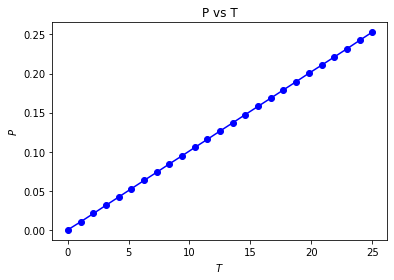

In [19]:
T_vals = np.linspace(0, 25, 25)
n_measure = 51

filename = lambda x: "part_c/log_" + str(x) + ".lammps"

T = np.zeros((len(T_vals), n_measure))
P = np.zeros((len(T_vals), n_measure))

for i, T_in in enumerate(T_vals):
    file = lf.File(filename(i+1))
    
    T[i, :] = file.get("Temp")
    P[i, :] = file.get("Press")

plt.figure("P vs T")
plt.title("P vs T")
plt.plot(np.mean(T[:, :-10], axis=1), np.mean(P[:, :-10], axis=1), 'o-b')
plt.xlabel(r"$T$")
plt.ylabel(r"$P$")
plt.show()

# Part e)
Measuring pressure as a function of temperature and density, P(T, rho)